# Programming for Chemists: How Machine Learning is Changing Science

Machine learning, the buzzphrase of the last 5 years but what is it? why is it important? why is there a session dedicated to it? Is it just applied statistics? We are going to:

* Find out what machine learning is and why it is important.
* Tools needed to do it.
* How it is used in science.
* Find out many of you have done machine learning without realising it.
* Predict the solubility of small drug molecules using machine learning.

**Aim of this session:**

Machine learning is a **vast** and **rapidly** growing field of research built onstatistics complex mathematics and statistics; which we will **not** cover. Instead we are going to explore how you can **use** it to solve real world problems; application over theory. There is a high probability you will end up using some form of machine learning in your future career, so it is more important you understand how you can use it as opposed to spending months or years understanding the mathematics behind the algorithms. [The following image](vas3k.com) gives a bird's-eye view of the machine learning world:

<center><img src="https://i.pinimg.com/736x/05/38/08/0538088de4041bda05c6f1febc99e1bb.jpg" width="600" height="600" /></center>

We already benefit from machine learning in our day to day lives:

* **Image recognition**: Software trained using ML to scan through hundreds of MRI and CT medical images per second highlighting abnormalities. Computers have long exceeded the accuracy of a human in this field.
* **Medical diagnosis**: Training programs using clinical symptoms to accurately diagnose patients. 
* **Speech recognition**: ML is behind the rise of assistant software like Alexa and Siri. 
* **Google**: Google is at the forefront, investing huge amounts of money into all facets of ML. It is used in their translation software, Google photos, Google assistant, Google Maps, self driving cars and many more.
* **Financial services**: Used extensively in the finance sector to predict market shifts, customer spending patterns and it can even predict account closures before they occur!

**Philosophy of AI:**

Artificial Intelligence is a hotly debated issue in computer science and wider society for good reason; it could be humanities greatest invention but could it be our last? My personal take is more optimistic believing that AI systems capable of learning will only enhance and improve our own capability of learning. If I am wrong, at least this session will give an insight into how the machine overlords will *think*.  

## Artificial Intelligence, Machine Learning, and Deep Learning. What's the Difference?

<center><img src="https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/AI_ML_DL.jpeg" width="400" height="400" /></center>


There are no agreed upon, standard definitions for any of these subject fields, but the [Google Machine Learning glossary](https://developers.google.com/machine-learning/glossary#m) provides sensible definitions:

**Artificial Intelligence (AI):** A non-human program or model that can solve sophisticated tasks. For example, a program or model that translates text or a program or model that identifies diseases from radiologic images both exhibit artificial intelligence. Formally, machine learning is a sub-field of artificial intelligence. However, in recent years, some organizations have begun using the terms artificial intelligence and machine learning interchangeably.

**Machine Learning (ML):** A program or system that builds (trains) a predictive model from input data. The system uses the learned model to make useful predictions from new (never-before-seen) data drawn from the same distribution as the one used to train the model. Machine learning also refers to the field of study concerned with these programs or systems.

**Deep Learning (DL):** Is a machine learning technique that constructs artificial neural networks to mimic the structure and function of the human brain.

Machine learning exists at the intersection of computer science, statistics, and data science. It uses elements of each of these fields, processing data in a way that can detect and learn from patterns, predict future activity, or make decisions.

## Hardware Barrier

With so many companies wanting to use machine learning, its implementation has become quite high level requiring small amounts of code; the biggest hurdle being the cost of the hardware to calculate in sensible time.

AI, ML and DL are mainly based on learning from **very large quantities of data** which standard computational hardware struggles with. To achieve results within a sensible time frame you often need server racks full of Graphical Processing Units (GPUs) to run everything using massively parallel programming. The popularity of video gaming has been the dominant force in the development of faster and bigger GPU technology which has allowed AI, ML and DL to expand so quickly. For companies wanting to analyse large volumes of data the bill can be hundreds of thousands of pounds on hardware/software alone plus the power and expertise to run it.

**Difference between a CPU and GPU?**

This is a technical topic but NVIDIA hired the Mythbusters to explain the difference more practically:

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('-P28LKWTzrI',  width=700, height=500)

**Matrix Multiplication, CPU vs. GPU:**

I wrote two programs which multiply two randomly generated matrices of specified size, \\(\mathbf{A}\\) and \\(\mathbf{B}\\)

\\[
    \mathbf{M} = \mathbf{A} \times \mathbf{B},
\\]
and timed how long it took for the programs to finish. One of these programs was written for the CPU using C++ whilst the other was written for the GPU using the CUDA programming language.

**CPU:** Intel Xeon W-2145, 3.70GHz, 16 logical cores

**GPU:** Titan V, 1.2 MHz, 5120 CUDA cores. This was given to us by **NVIDIA** to use in our research as part of their accelerated data science program.

<center><img src="https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/CPU_vs_GPU_MatrixMult-1.png" width="600" height="600" /></center>


## Turing test: How we test Artificial Intelligence

Machine learning is a realisation of the pioneering work of Alan Turing in the 1950s;  where he published multiple papers, one titled "[Computing Machinery and Intelligence](https://academic.oup.com/mind/article/LIX/236/433/986238)". In this paper he described "*The Imitation Game*" as a means of answering a big question, "**Can machines think?**". Being practically minded Turing noted that trying to define **thinking** is a philosophical hurdle so opted for rephrasing the question as "*Can machines do what we (as thinking entities) can do?*" drawing a sharp distinction between the physical and intellectual capacities of a human. 

Turing described his version of the "*imitation game*", in which an interrogator attempts to distinguish which of two players is female, and where each player, hidden from sight, attempts to fool the interrogator into thinking they are the female through written answers to the interrogator’s questions. In Turing’s version, the male is replaced by a machine that attempts to respond to questions in such a way as to fool the interrogator into thinking it, not the female player, is female. 

The imitation game is now more commonly referred to as the **Turing test** and a subtle but vital quality of the test is that *written human language represents human-level thinking*. If the human Turing test judge is competent, then an entity requires *human-level intelligence* in order to pass the test. Modern AI systems must pass this test if they are to be deemed to have human level intelligence and as of November 2020, **nothing has passed the Turing test**, even if some have claimed to. Ray Kurzweil, Google’s director of engineering predicts that something will pass the Turing test between the years 2029 and 2040.

## Supervised vs. Unsupervised Learning

There are two main types of machine learning, called **supervised** and **unsupervised** learning.

### Supervised Learning

Consider a mathematical function of the form

\\[
    y = f(x).
\\]

Conventionally we plug in the input values \\(x\\), into the known function \\(f\\), to calculate \\(y\\). **Supervised learning** is where you have input values, \\(x\\), and an output value \\(y\\), and use an algorithm to calculate \\(f\\), the mapping function from the input to the output. **The majority of practical machine learning uses supervised learning.** The more input and output data supplied, the more accurately \\(f\\) can be defined **in theory**.

### Unsupervised Learning

In contrast to supervised learning, **unsupervised learning** is where you only have input data \\(x\\) and no corresponding output variables. The goal for unsupervised learning is to model the underlying structure or distribution in the data to learn more about it. It is phrased **unsupervised learning** as unlike supervised learning there is no correct answer and the algorithms are left to their own devises tasked with discovering and presenting interesting structure in the data.

## Differences between conventional programming and machine learning
These two types of machine learning signify the difference between traditional programming and machine learning. Conventionally we provide input data and the rules needed to transform this input data into a certain output. Supervised machine learning is supplied input data together with the related output data and attempts to figure out the rules that transform the input into the output data.

## Machine Learning in Python: TensorFlow with a worked example

Python remains one of the most popular languages for machine learning; boasting a variety of libraries aimed at its implementation including [**TensorFlow**](https://www.tensorflow.org/); an end-to-end open source machine learning platform developed by Google, available for many programming languages including Python.

Most machine learning problems follow a similar implementation and solution pattern:

1. Read in your data. 
2. Split the data into training and testing data.
3. Format the data. 
4. Fit a model to the training data.
5. Test the model on the testing data.

We will learn to use TensorFlow using a simple example, **how to train a computer to recognise handwritten digits**; the "Hello world" of the machine learning world. First we import tensorflow:

In [ ]:
import tensorflow as tf

**Keras** is a wrapper built on top of TensorFlow making it more accessible and easier to work with. We use it to access the [MNIST data set](http://yann.lecun.com/exdb/mnist/), composed of handwritten digits; 60,000 **training** images and 10,000 **testing** images:

**Training set:** A set where we know the outcome of the feature we are modelling.

**Testing set:** A set to test the model created from the training set.

We load the data set using `mnist = tf.keras.datasets.mnist`. We will also print some of the images to visualise what we are going to train and test on:

In [ ]:
import matplotlib.pyplot as plt

# load the mnist data set using keras
mnist = tf.keras.datasets.mnist

# next we split the data into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# For any pixel of the image, the value assigned to it can fall between 0 and 255. We divide by 255 to normalize the range from 0 -> 1 since this makes learning faster
x_train, x_test = x_train / 255.0, x_test / 255.0

# plot the first 5 images using a loop
for i in range(5):  
    plt.imshow(x_train[i]) # imshow displays an image
    plt.colorbar()         # the colorbar shows the intensity of each pixel
    plt.show()             

### Artificial Neural Networks

A neural network, more properly referred to as an 'artificial' neural network (ANN) to distinguish it from its biological counterpart, is best defined by Dr. Robert Hecht-Nielsen inventor of one of the first neurocomputers:

    ...a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs."

As the name suggests they are inspired by biological neurons in a brain shown via the following image taken from [Machine learning algorithms in boiler plant root cause analysis ](https://www.ee.co.za/article/application-of-machine-learning-algorithms-in-boiler-plant-root-cause-analysis.html): 

<center><img src="https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/neuron_node_comparison.jpeg" width="600" height="600" /></center>

Biological neurons are connected through synapses where information flows, corresponding to **weights** in our computational model. When we train a neural network we want the neurons to fire whenever they learn specific patterns from the data, and we model the fire rate using an **activation function**; a function attached to each neuron in the network, and determines whether it should be fired or not, based on whether each neuron's input is relevant for the model's prediction. In our biological neuron analogy: 

* **Synapse** strengths (weights, w, in our model) are learnable controlling the strength of influence and its direction: excitory (positive weight) or inhibitory (negative weight) of one neuron on another. 
* **Dendrites** carry the signals to the **cell body** where they are summed. If the final sum is above a certain threshold, the neuron can fire, sending a signal along its **axon**. 
* The timings of the spikes do not matter in our computational model as only the frequency of the firing communicates information. The firing rate of the neuron is modelled using an activation function (e.g sigmoid function), which represents the frequency of the signals along the axon.

**How do neural networks learn?** Think about a person throwing a paper ball into a bin; the first throw provides feedback on the mass of the paper ball, air resistance, distance to the bin, force of throw etc... If they missed the bin on their first throw, the brain will change how it conducts the second throw using the information it learned from the first throw. Neural networks **learn** in exactly the same way, typically by a feedback process called **backpropagation** ("backprop" for short). Backpropagation involves **comparing the output a network produces with the output it was meant to produce**, and using the difference between them to modify the weights of the connections between the layers in the network, working from the output layers through the hidden layers to the input layers-going backward. Given time backpropagation causes the network to learn, reducing the difference between actual and intended output with the intention to make them coincide.

Our computer model will use features of the images in the training set to learn and then make predictions on similar images that it has not seen before. We will program a basic sequential neural network with a single input, hidden and output layer; sequential meaning building up the neural network a layer at a time. Much more sophisticated models with multiple hidden layer could be used but this tutorial aims to keep it simple. We do not need to specify what patterns to look for in the images - **the neural network learns on its own**. A more computationally relevant diagram of a neural network is as follows:

<center><img src="https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/neural-network-1.png" width="600" height="600" /></center>

We can now being programming our neural network using keras:

1. Call the Sequential model from `keras.models`: 

    `tf.keras.models.Sequential`

2. Flatten the images. This flattening process is not ideal, as we obscure information about which pixels are next to each other but this involves more complex techniques so for the purposes of this example we will flatten the images into vectors. The input layer has 784 neurons, one for each pixel in the images \\((28, 28) \rightarrow 28 \times 28 \rightarrow 784\\):

    `tf.keras.layers.Flatten(input_shape=(28, 28))`

3. Create hidden layer with 512 nodes. 512 was chosen as a sensible value from previous experience. Choosing the number of hidden nodes is a complex topic not important for this simple example. In Keras, `Dense` usually refers to a single layer hence we are calling it here as we have a single hidden layer <font color='red'>experiment with multiple hidden layers and different activation functions!</font>:

    `tf.keras.layers.Dense(512, activation=tf.nn.relu)`
    
    There is no "best" activation function and to obtain the best results requires a lot of testing. Here we are using the `relu` activation function which is simply

\\[
    f(x) = \text{max}(0,x)
\\]

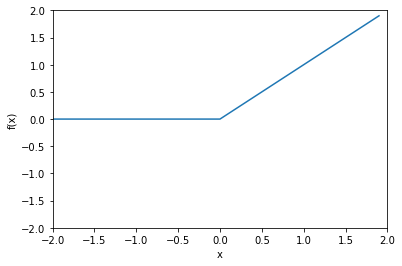

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 2, .1)
zero = np.zeros(len(x))
y = np.max([zero, x], axis=0)

fig, ax = plt.subplots()
ax.set_ylim([-2.0, 2.0])
ax.set_xlim([-2.0, 2.0])
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

ax.plot(x, y)

plt.show()

4. Neural networks can suffer from overfitting to training data so to overcome this limitation we randomly selected neurons to be ignored in training. In this example we are dropping one of every five inputs for the next training cycle (0.2 = 20%). If certain neurons are turned off then other neurons need to step in to handle the portrayal of the data in each cycle, resulting in a better model and minimising the possibility of overfitting. We set the dropout rate using `keras.layers.Dropout()`:

    `tf.keras.layers.Dropout(0.2)`

5. We now insert another layer, the output layer with 10 neurons, one for each digit, \\(0 \rightarrow 9\\). We will use a different activation function for this layer called the **softmax** activation function which is generally used if we need to **classify our data** which we are trying to do:

    `tf.keras.layers.Dense(10, activation=tf.nn.softmax)`

In [15]:
# build the neural netowrk sequentially as layers
model = tf.keras.models.Sequential([                              # 1. specify sequential model
        tf.keras.layers.Flatten(input_shape=(28, 28)),            # 2. format the images into a 2D array
        tf.keras.layers.Dense(512, activation=tf.nn.relu),        # 3. create a densely connected neural layer with 512 nodes
        tf.keras.layers.Dropout(0.2),                             # 4. drop 20% of the neurons each training cycle
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)       # 5. create output layer with10 nodes and use Softmax activation function
])

It is not possible to visualise all the nodes in our model, but the following picture shows the output nodes with a greater number of input and hidden nodes, giving an insight into how neural networks scale:

<center><img src="https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/neural_network-2.png" width="600" height="600" /></center>

Now we can compile the model:

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Is Adam me? **No!**. It is not even an acronym but is derived from "adaptive moment estimation". Adam is an optimization algorithm which updates network weights based on the training data. The loss function is used to measure the variation between the value being predicted and what it actually is. **The goal is to minimize the loss (error) function.**

We can now fit and evaluate our model. An **epoch** is not the same thing as an iteration, an epoch is a **complete pass of the training data**. Having a model run for too few epochs would weaken the models' performance. Having a model run for too many epochs would risk it starting to "remember" the outputs it may want compromising its accuracy:

In [17]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2171 - accuracy: 0.9354
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0967 - accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0668 - accuracy: 0.9788
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0532 - accuracy: 0.9829
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9813


[0.06350130587816238, 0.9812999963760376]

We have achieved an accuracy of ~ 98%  with just a few lines of Python code!

### Complete program

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Now we have a model, **let's test on a number which we draw!** I went to paint and drew a number 4 using the paintbrush tool and converted it into the same image format that `mnist` uses. This is important as the model learned on images which had the same normalization and size so it would not describe an image well with a completely different format! My 4 looks like this:

<center><img src="https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/four_original.png" width="200" height="200" /></center>

after converting it into a \\(28 \times 28 \\) pixel image:

<center><img src="https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/four_converted.png" width="200" height="200" /></center>

We can now test our model to see if it can tell us that the number I drew is a 4:

In [18]:
import cv2 as cv
import requests
import numpy as np

# this part of the code is only needed in Jupyter. If running locally, cv can read images from your documents without needing requests etc...
url = r'https://raw.githubusercontent.com/adambaskerville/ProgrammingForChemists/master/images/four_converted.png'
resp = requests.get(url, stream=True).raw
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv.imdecode(image, cv.IMREAD_GRAYSCALE)

image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255

# call the predict function on our image
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

# print the probability that our image is 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
print(pred)

# ask it to print its prediction
print("\nPredicted digit drawn is {} with {:.2f}% predicted accuracy".format(pred.argmax(), pred[0, pred.argmax()]*100))

[[1.07319174e-04 1.44651916e-04 1.29929306e-02 1.29555745e-04
  9.60269630e-01 4.83972544e-04 8.24290980e-03 1.73664689e-02
  2.27448763e-04 3.50752707e-05]]

Predicted digit drawn is 4 with 96.03% predicted accuracy


The computer has learned from training data what digits looks like and we supplied it a brand new image of the number 4, and it was able to correctly identify the number with >95% accuracy. This reveals the predictive power of DL and ML for image recognition which has so many applications to name but a few:

1. Cell counting when  culturing cells.
2. Looking for abnormalities in medical images.
3. Augmented reality.
4. Driverless cars.
5. Tracking animal numbers and their migration patterns.

## Worked Example: Linear Regression, Beer-Lambert law

[Linear Regression](https://mathworld.wolfram.com/LinearRegression.html) is a conventional statistical method borrowed by machine learning as a **supervised** learning algorithm where the predicted output is continuous having a constant slope. It is used to predict values such as sales or price; rather than classifying them into categories such as car or tractor. Linear regression is the simplest machine learning algorithm which a lot of you have encountered before without realising it; **finding the line of best fit.** 

Is this really machine learning? Lets check:

* We have the input data, \\(x\\).
* We have the output data, \\(y\\).
* We calculate the gradient and point of intercept of a line, forming a function \\(f\\), which attempts to map \\(x\\) onto \\(y\\)  \\(\hspace{0.5cm}\therefore \hspace{0.5cm} y = f(x) \\).

Linear regression provides us the mapping function \\(f\\), which we can then use to predict output values we have not explicitly calculated or measured. **Machine learning is often confused with applied statistics** but linear regression can be classed as both a statistical method and a machine learning algorithm. **Lots of you have been doing machine learning without even realising it!** 

We are going to solve a modified version of a problem some of you encountered in Excel workshop 4 of Maths and Data Analysis for Chemists.

**Question:**

UV/vis spectrophotometry is often used to determine concentrations of metal ions in solution. In order to do this, knowledge of the molar extinction coefficient is needed. This is the absorbance per unit concentration at a given wavelength. A student has made a series of standard samples of KMnO\\(_4\\) of known concentrations, so as to determine the molar extinction coefficient using the Beer-Lambert law

\\[
    A = \epsilon c l,
\\]
where \\(A\\) is the measured absorbance, \\(\epsilon\\) is the molar extinction coefficient, \\(c\\) is the concentration and \\(l\\) is the path length of the spectrophotometer cell (1 cm). The spectrometer is known to suffer from a constant offset, hence the following equation should be better model the experimental data:

\\[
    A = \epsilon c l + A_0,
\\]

Using the data, predict the absorbance when the concentration is 0.7 mM.

**Solution:**

This question is asking for a line of best fit to be fitted to the data set, noting that the equation of a straight line has the same form as the Beer-Lambert law

\\[
    \begin{array}{cccccc}
        & \underbrace{A} & = & \underbrace{\epsilon c l} & + & \underbrace{A_0} \\
        & \downarrow && \downarrow && \downarrow\\
        & y & = & mx & + & c 
    \end{array}
\\] 

The original data set consisted of 10 data points but I have generated 200 data points for the purposes of this example, stored in `UV_vis_data.csv`. We will read this file in using pandas and fit a line of best fit to it using two techniques

1. **No machine learning:** We use pandas to read in the `.csv` file and Using [`numpy.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) which fits polynomials to data sets, where we specify the order of polynomial as `1`, a straight line:

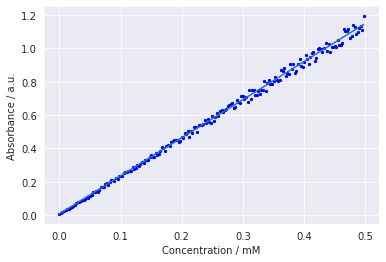

1.6072270377366364


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns # we call this library which is based on matplotlib

# set a dark grid style for the plot (looks nice!)
sns.set_style("darkgrid")

# create the figure (fig) and axes (ax) objects
fig, ax = plt.subplots()

# define the column names in the data file
colnames=['concentration', 'absorbance']

# read the data file into a Pandas DataFrame and assign the column names
uv_dat = pd.read_csv("data/UV_vis_data.csv", names=colnames)

# use numpy to fit a line of best fit using 'polyfit'
m, c = np.polyfit(uv_dat['concentration'], uv_dat['absorbance'], 1)

# create a numpy array of x-values in order to plot the line of best fit
x = np.arange(uv_dat['concentration'].min(),uv_dat['concentration'].max(),  0.001)

# define how the y-values are calculated using the equation of a straight line
y = m*x + c

# define the axes labels
ax.set_xlabel('Concentration / mM')
ax.set_ylabel('Absorbance / a.u.')

# plot a scatter plot
plt.scatter(uv_dat['concentration'], uv_dat['absorbance'], s=5, color='blue');

# plot the x and y-values of the line of best fit
plt.plot(x,y)

plt.show()

# declare a value of x, the absorbance, for the line of best fit to use and produce a corresponding value of the concentration
conc = 0.7

# print the predicted value of concentration given an absorbance of 0.7 a.u. 
print(m*conc + c)

2. **Machine learning:** Using a linear regression machine learning algorithm from tensorflow:

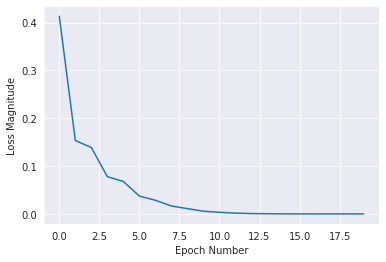

[[1.607415]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

# define the column names in the data file
colnames=['concentration', 'absorbance']

# read the data file into a Pandas DataFrame and assign the column names
uv_dat = pd.read_csv("data/UV_vis_data.csv", names=colnames)

# call the sequential model using keras
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

# compile the model using a mean-squared loss error and the Adam optimizer
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

history = model.fit(np.asarray(uv_dat['concentration']), np.asarray(uv_dat['absorbance']), epochs=20, verbose=False)

# plot the loss function against epoch number
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()

# declare a value of x, the absorbance, for the line of best fit to use and produce a corresponding value of the concentration
conc = 0.7

print(model.predict([conc]))

We have now covered two machine learning examples and for our final example we will venture into the world of **drug discovery** and use machine learning to predict the solubility of drug molecules. First we will cover some prerequisites. 

## DeepChem: Open source machine learning for Life Science

[DeepChem](https://deepchem.io/) is a collection of open source tools for drug discovery, materials science, quantum chemistry, and biology; including **machine learning**. Application of machine learning to drug discovery is **very big business** [estimated to be worth \\$591 million in 2018](https://www.fnfresearch.com/ai-for-drug-discovery-market-by-drug-type)  and is expected to reach a value of around \\$12 billion by 2027.

**Why?**

It is estimated that bringing a new drug to market [costs major pharmaceutical companies at least \\$4 billion](https://www.forbes.com/sites/matthewherper/2012/02/10/the-truly-staggering-cost-of-inventing-new-drugs/#3d91a3bd4a94), and can take 10-15 years with less than 10% making it to market.

Machine learning offers efficient understanding of vast amounts of chemical data, allowing for selection of the best drug candidates and predicting their possible properties; **all without even setting foot in a lab**. Drug companies like machine learning as it **can save them huge amounts of money and time.**

### Basics of DeepChem

The first thing we need learn is how we can represent a wide range of complex chemical structures using a unique metric; SMILES: **S**implified **M**olecular-**I**nput **L**ine-**E**ntry **S**ystem. These take the form of a single line notation for describing the structure of chemical species using short strings. SMILES strings can be imported by most molecule editors for conversion back into two-dimensional drawings or three-dimensional models of the molecules.

[SMILES](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html) has the following syntax rules:

1. **Atoms and Bonds:**

 Atoms are represented by the standard abbreviation of the chemical elements, in square brackets. A bond is represented using one of the following symbols: 
   
 | Symbol    | Meaning                 | 
 |:---------:|:------------------------|
 | -         | Single bond             |   
 | =         | Double bond             |
 | #         | Triple bond             |
 | $         | Quadruple bond          |
 | :         | Aromatic bond           |
 | .         | Disconnected structures |

 Examples:
    
 | SMILES      |  Chemical formula  | Name            | 
 |:------------|:-------------------|:----------------|
 |  [NH4+]     | NH$_4^+$           | Ammonium        |   
 |  [OH-]      | OH$^-$             | Hydroxide anion |
 | [Na+].[Cl-] | NaCl               | Sodium chloride |
 | [OH3+]      | H$_3$O$^+$         | Hydronium cation|

 Combining atomic symbols and bond symbols allows for simple chain structures to be represented. The structures that are entered using SMILES are **hydrogen-suppressed**, represented without hydrogens. SMILES software understands the number of possible connections that an atom can have. 

 | SMILES  |  Chemical formula  | Name            | 
 |:--------|:-------------------|:----------------|
 |  CC     | CH$_3$CH$_3$       | Ethane          |   
 | C=C     | CH$_2$CH$_2$       | Ethene          |

 <font color='red'>Experiment with this notation using the following code block which draws the structures:</font>

In [21]:
from rdkit import Chem
from rdkit.Chem import Draw

# put some molecular structures in a list
smiles_list = ["CC","C=C","[Na+].[Cl-]"]

# draw the chemical structures using MolFromSmiles
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

# use MolsToGridImage to put the images in a grid
img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(250, 250), legends=None, useSVG=True)

# print the structures to screen
img

ModuleNotFoundError: No module named 'rdkit'

3. **Branches:**

 A branch from a chain is specified by placing the SMILES symbol(s) for the branch between parenthesis `()`. The string in parentheses is placed directly after the symbol for the atom to which it is connected. If it is connected by a double or triple bond, the bond symbol immediately follows the left parenthesis.

 | SMILES            |  Name            | 
 |:------------------|:-----------------|
 |  CC(O)C           | 2-Propanol       |   
 | CC(C)CC(=O)       | 2-Methylbutanal  |
 | c1c(N(=O)=O)cccc1 | Nitrobenzene     |


4. **Rings:**

 SMILES allows a user to identify ring structures using numbers to identify the opening and closing ring atom. For example, in `C1CCCCC1`, the first carbon has a number '1' which connects by a single bond with the last carbon which also has a number '1'. Chemicals that have multiple rings may be identified by using different numbers for each ring. If a double, single, or aromatic bond is used for the ring closure, the bond symbol is placed before the ring closure number. Some examples:


 | SMILES         |  Name            | 
 |:---------------|:-----------------|
 |  C=1CCCCC1     | Cyclohexene      |   
 | c1ccccc1       | Benzene          |
 | C1OC1CC        | Ethyloxirane     |
 | c1cc2ccccc2cc1 | Naphthalene      | 

5. **Charged atoms:**

 Charges on an atom can be used to override the knowledge regarding valence that is built into SMILES software. The format for identifying a charged atom consists of the atom followed by brackets which enclose the charge on the atom. The number of charges may be explicitly stated ({-1}) or not ({-}):

 | SMILES              |  Name                               | 
 |:--------------------|:------------------------------------|
 |  CCC(=O)O{-1}       | Ionized form of propanoic acid      |   
 | c1ccccn{+1}1CC(=O)O | 1-Carboxylmethyl pyridinium         |

 <font color='red'>Pick several structures and draw them using the code box below</font>:

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# put some molecular structures in a list
smiles_list = []

# draw the chemical structures using MolFromSmiles
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

# use MolsToGridImage to put the images in a grid
img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(250, 250), legends=None, useSVG=True)

# print the structures to screen
img

### Worked Example: Predicting the solubility of small molecules

An important property of a new candidate drug is its solubility; if it isn't soluble enough then it will be unlikely to enter a patient's bloodstream to have a therapeutic effect. We will now use machine learning to build a model that predicts solubility of small molecules based on nothing but their chemical structure. We will be using the delaney dataset from [MoleculeNet](http://moleculenet.ai/datasets-1). This dataset contains structures and log-scale water solubility data for 1128 compounds: 

In [ ]:
# load the dataset using deepchem
import deepchem as dc

tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

We will use a particular kind of neural network called a **graph convolutional network**, or "graphconv" for short. A **graph** in machine learning is a data structure comprising of nodes (vertices) and edges connected together to represent information with no definite beginning or end. Nodes can be thought of as the atoms while the edges represent connections, the bonds:

In [ ]:
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)

We now need to train the model on the data set. We simply give it the data set and tell it how many epochs of training to perform (that is, how many complete passes through the data to make).

In [ ]:
model.fit(train_dataset, nb_epoch=100)

We should now have a fully trained model, but first we must evaluate the model on the **test set**. We do that by calling `evaluate()` on the model. For this example, we will use the **pearson correlation**, which is a number between -1 and +1 that indicates to what extent 2 variables are linearly related. We can evaluate it on both the training set and test set in order to test for overfitting:

In [ ]:
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

print("Training set score:", model.evaluate(train_dataset, [metric], transformers))
print("Test set score:", model.evaluate(test_dataset, [metric], transformers))

I don't have any new molecules to hand to test our model on, so let's just use the first ten molecules from the test set. For each one we print out the chemical structure (represented as a SMILES string) and the predicted solubility. <font color='red'>If you had a molecule you could convert it into a SMILES format and test our model on it.</font>

In [23]:
# predict the solubility of 10 molecules from the test data
solubilities = model.predict_on_batch(test_dataset.X[:10])

# print the solubilities and the corresponding structure
for molecule, solubility in zip(test_dataset.ids, solubilities):
    print(solubility, molecule)

NameError: name 'test_dataset' is not defined

**Complete solubility program:**

In [ ]:
# load the dataset using deepchem
import deepchem as dc

tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)

model.fit(train_dataset, nb_epoch=100)

metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)

print("Training set score:", model.evaluate(train_dataset, [metric], transformers))
print("Test set score:", model.evaluate(test_dataset, [metric], transformers))

# predict the solubility of 10 molecules from the test data
solubilities = model.predict_on_batch(test_dataset.X[:10])

# print the solubilities and the corresponding structure
for molecule, solubility in zip(test_dataset.ids, solubilities):
    print(solubility, molecule)

## Review

In this session we covered:

* The difference between Artificial Intelligence (AI), Machine Learning (ML) and Deep learning (DL).
* Hardware required for machine learning.
* Difference between a Central Processing Unit (CPU) ans Graphics Processing Unit (GPU)
* Doing machine learning using tensorflow in python.
* Wrote a program to recognise hand written numerical digits.
* Shopwed that linear regression is a machine learning algorithm.
* Used linear regression to model the Beer-Lambert law.
* Learned the basics of the DeepChem library and SMILES notation.
* Wrote a program to estimate the solubility of small drug molecules.

## Further Reading:

The DeepChem community has put together a series of tutorials on how to use DeepChem including a large variety of worked examples:
    
[DeepChem Tutorials](https://github.com/deepchem/deepchem/tree/master/examples/tutorials)